# SOAI Lab: Smart Home Energy Consumption Prediction


# INSTALL DEPENDENCIES


## Part 0 : Import used libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 : Understand the data and Exploring it

### 1.1. Load the Training Data :
- The first step is to load the training data into the system. This is typically done using a data

In [2]:
# Load the training data
train_data = pd.read_csv('data/train_energy.csv')

### 1.2. Inspect the Training Data
- Inspect the training data to understand the distribution of the target variable and the features. This step is crucial

In [3]:
# Display the first few rows of the training data
print(train_data)

# Display information about the training data
print(train_data.info())

# Display summary statistics of the training data
print(train_data.describe())

# Check for missing values in the training data
print(train_data.isnull().sum())

                  DateTime  EnergyConsumption(kWh)
0      2015-11-01 00:00:00                      15
1      2015-11-01 01:00:00                      13
2      2015-11-01 02:00:00                      10
3      2015-11-01 03:00:00                       7
4      2015-11-01 04:00:00                       9
...                    ...                     ...
10244  2016-12-31 20:00:00                      37
10245  2016-12-31 21:00:00                      32
10246  2016-12-31 22:00:00                      33
10247  2016-12-31 23:00:00                      32
10248  2017-01-01 00:00:00                      27

[10249 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10249 entries, 0 to 10248
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                10249 non-null  object
 1   EnergyConsumption(kWh)  10249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 160.

### 1.3. Extracting Meaningful Informations
- Extracting temporal features form Datetime

In [4]:
# Convert DateTime to pandas datetime object
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])

## Step 2 : Data Splitting

### 2.1. Sort and Split into train and validation

In [5]:
# Sort by DateTime
train_data = train_data.sort_values(by='DateTime')

In [6]:
# Define split index
split_index = int(0.8 * len(train_data))

# Split into train and validation
train = train_data[:split_index]
val = train_data[split_index:]

In [7]:
# Step 6: Split the data into train, validation, and test sets
split_index_train = int(0.7 * len(train_data))
split_index_val = int(0.9 * len(train_data))

train2 = train_data[:split_index_train]
val2 = train_data[split_index_train:split_index_val]
test = train_data[split_index_val:]

### 2.2. Visualize Split data

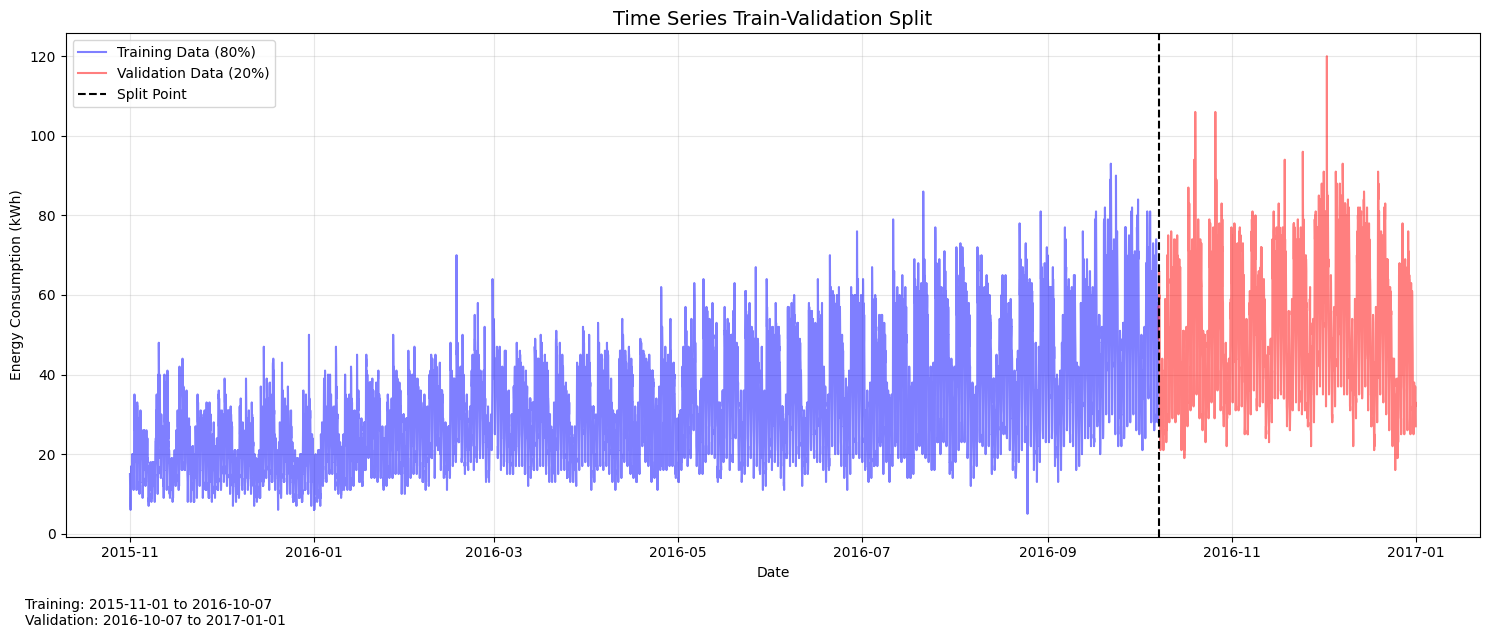

In [8]:
# Cell 2: Visualize Split
plt.figure(figsize=(15, 6))

# Plot training data
plt.plot(train['DateTime'], train['EnergyConsumption(kWh)'],
         color='blue', alpha=0.5, label='Training Data (80%)')

# Plot validation data
plt.plot(val['DateTime'], val['EnergyConsumption(kWh)'],
         color='red', alpha=0.5, label='Validation Data (20%)')

# Add split line
split_date = train['DateTime'].max()
plt.axvline(x=split_date, color='black', linestyle='--', label='Split Point')

# Customize plot
plt.title('Time Series Train-Validation Split', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add explanation
plt.figtext(0.02, -0.05, 
            f'Training: {train["DateTime"].min().date()} to {train["DateTime"].max().date()}\n' +
            f'Validation: {val["DateTime"].min().date()} to {val["DateTime"].max().date()}',
            fontsize=10, ha='left')

plt.tight_layout()
plt.show()

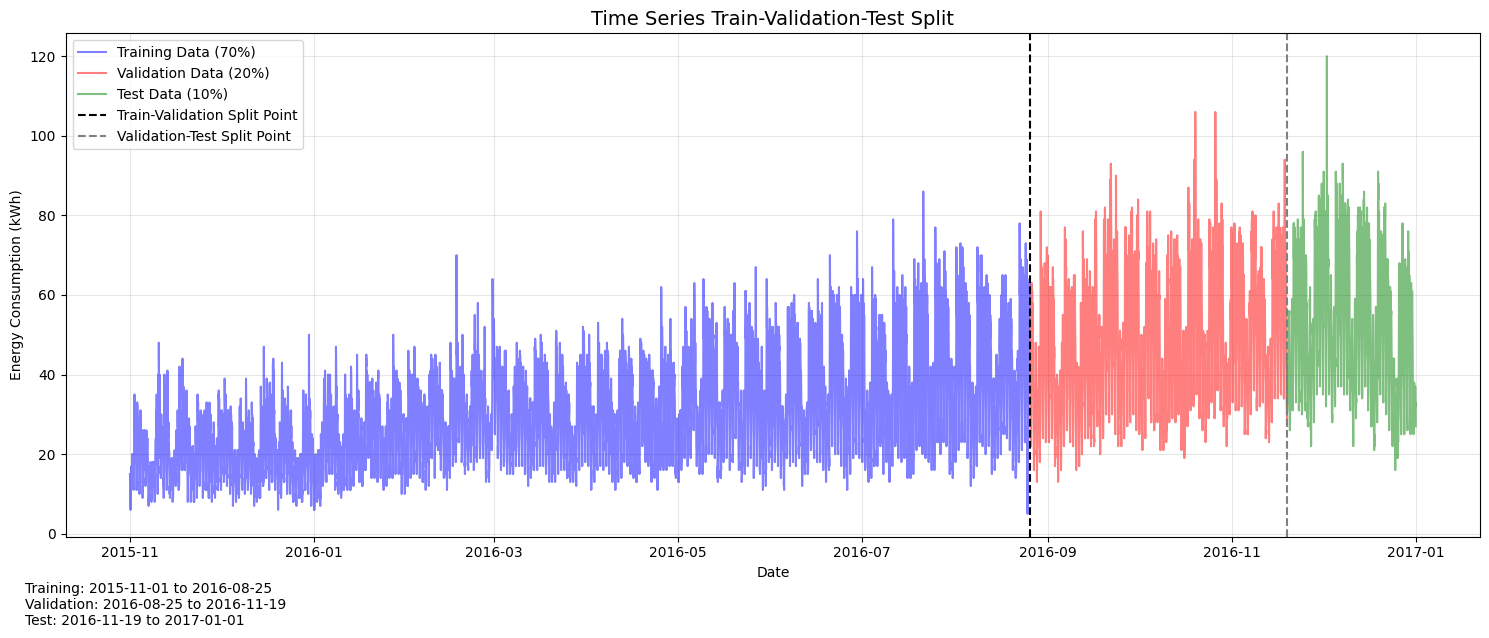

In [14]:
plt.figure(figsize=(15, 6))

# Plot training data
plt.plot(train2['DateTime'], train2['EnergyConsumption(kWh)'],
         color='blue', alpha=0.5, label='Training Data (70%)')

# Plot validation data
plt.plot(val2['DateTime'], val2['EnergyConsumption(kWh)'],
         color='red', alpha=0.5, label='Validation Data (20%)')

# Plot test data
plt.plot(test['DateTime'], test['EnergyConsumption(kWh)'],
         color='green', alpha=0.5, label='Test Data (10%)')

# Add split lines
split_date_train_val = train2['DateTime'].max()
split_date_val_test = val2['DateTime'].max()
plt.axvline(x=split_date_train_val, color='black', linestyle='--', label='Train-Validation Split Point')
plt.axvline(x=split_date_val_test, color='grey', linestyle='--', label='Validation-Test Split Point')

# Customize plot
plt.title('Time Series Train-Validation-Test Split', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add explanation
plt.figtext(0.02, -0.05, 
            f'Training: {train2["DateTime"].min().date()} to {train2["DateTime"].max().date()}\n' +
            f'Validation: {val2["DateTime"].min().date()} to {val2["DateTime"].max().date()}\n' +
            f'Test: {test["DateTime"].min().date()} to {test["DateTime"].max().date()}',
            fontsize=10, ha='left')

plt.tight_layout()
plt.show()

### 2.3. Print Split Informations

In [10]:

# Cell 3: Print Split Information
print("\nTime Series Split Summary:")
print(f"Total samples: {len(train_data)}")
print(f"Training samples: {len(train)} ({len(train)/len(train_data)*100:.1f}%)")
print(f"Validation samples: {len(val)} ({len(val)/len(train_data)*100:.1f}%)")
print(f"\nTraining period: {train['DateTime'].min()} to {train['DateTime'].max()}")
print(f"Validation period: {val['DateTime'].min()} to {val['DateTime'].max()}")

print(train.head())
print(val.head())



Time Series Split Summary:
Total samples: 10249
Training samples: 8199 (80.0%)
Validation samples: 2050 (20.0%)

Training period: 2015-11-01 00:00:00 to 2016-10-07 14:00:00
Validation period: 2016-10-07 15:00:00 to 2017-01-01 00:00:00
             DateTime  EnergyConsumption(kWh)
0 2015-11-01 00:00:00                      15
1 2015-11-01 01:00:00                      13
2 2015-11-01 02:00:00                      10
3 2015-11-01 03:00:00                       7
4 2015-11-01 04:00:00                       9
                DateTime  EnergyConsumption(kWh)
8199 2016-10-07 15:00:00                      57
8200 2016-10-07 16:00:00                      55
8201 2016-10-07 17:00:00                      49
8202 2016-10-07 18:00:00                      61
8203 2016-10-07 19:00:00                      66


In [11]:

# Print split information
print("\nTime Series Split Summary:")
print(f"Total samples: {len(train_data)}")
print(f"Training samples: {len(train2)} ({len(train2)/len(train_data)*100:.1f}%)")
print(f"Validation samples: {len(val2)} ({len(val2)/len(train_data)*100:.1f}%)")
print(f"Test samples: {len(test)} ({len(test)/len(train_data)*100:.1f}%)")

print(f"\nTraining period: {train2.index.min()} to {train2.index.max()}")
print(f"Validation period: {val2.index.min()} to {val2.index.max()}")
print(f"Test period: {test.index.min()} to {test.index.max()}")

print("\nTraining Data Head:")
print(train2.head())
print("\nValidation Data Head:")
print(val2.head())
print("\nTest Data Head:")
print(test.head())


Time Series Split Summary:
Total samples: 10249
Training samples: 7174 (70.0%)
Validation samples: 2050 (20.0%)
Test samples: 1025 (10.0%)

Training period: 0 to 7173
Validation period: 7174 to 9223
Test period: 9224 to 10248

Training Data Head:
             DateTime  EnergyConsumption(kWh)
0 2015-11-01 00:00:00                      15
1 2015-11-01 01:00:00                      13
2 2015-11-01 02:00:00                      10
3 2015-11-01 03:00:00                       7
4 2015-11-01 04:00:00                       9

Validation Data Head:
                DateTime  EnergyConsumption(kWh)
7174 2016-08-25 22:00:00                      54
7175 2016-08-25 23:00:00                      47
7176 2016-08-26 00:00:00                      46
7177 2016-08-26 01:00:00                      38
7178 2016-08-26 02:00:00                      32

Test Data Head:
                DateTime  EnergyConsumption(kWh)
9224 2016-11-19 08:00:00                      31
9225 2016-11-19 09:00:00                    

### 2.4. Save data to pickle

In [12]:
splits = {
    'train': train,
    'validation': val
}

# Save to pickle
import pickle
with open('timeseries_splits.pkl', 'wb') as f:
    pickle.dump(splits, f)

print("\nSplit data saved successfully!")


Split data saved successfully!


In [13]:
splits = {
    'train': train2,
    'validation': val2,
    'test': test
}

# Save to pickle
import pickle
with open('timeseries_splits2.pkl', 'wb') as f:
    pickle.dump(splits, f)

print("\nSplit data saved successfully!")


Split data saved successfully!
